Tokenization

In [5]:
lines = [
'How to tokenize?\nLike a boss.',
'Google is accessible via http://www.google.com',
'1000 new followers! #TwitterFamous',
]

split() not efficient.

In [6]:
for line in lines:
    print(line.split())

['How', 'to', 'tokenize?', 'Like', 'a', 'boss.']
['Google', 'is', 'accessible', 'via', 'http://www.google.com']
['1000', 'new', 'followers!', '#TwitterFamous']


regex

In [7]:
import re
_token_pattern=r"\w+"
token_pattern=re.compile(_token_pattern)

In [8]:
token_pattern

re.compile(r'\w+', re.UNICODE)

In [9]:
for line in lines:
    print(token_pattern.findall(line))

['How', 'to', 'tokenize', 'Like', 'a', 'boss']
['Google', 'is', 'accessible', 'via', 'http', 'www', 'google', 'com']
['1000', 'new', 'followers', 'TwitterFamous']


using placeholders before tokenizing

In [17]:
import re
_token_pattern=r"\w+"
token_pattern=re.compile(_token_pattern)
def tokenizer(line):
    line=line.lower()
    line=re.sub(r"https?:\/\/www\.[A-Z a-z 0-9]+\.[A-Z a-z]+",'_url_',line)
    line=re.sub(r'#\w+', '_hashtag_', line)
    line=re.sub(r'\d+','_num_', line)
    return token_pattern.findall(line)
for line in lines:
    print(tokenizer(line))

['how', 'to', 'tokenize', 'like', 'a', 'boss']
['google', 'is', 'accessible', 'via', '_url_']
['_num_', 'new', 'followers', '_hashtag_']


positive lookbehind(taking the hashtag value)

In [11]:
import re
_token_pattern=r"(?<=#)\w+"
token_pattern=re.compile(_token_pattern)
for line in lines:
    print(token_pattern.findall(line))

[]
[]
['TwitterFamous']


Vector Space Model

i) beg of words

In [22]:
lines = [
'How to tokenize?\nLike a boss.',
'Google is accessible via http://www.google.com',
'1000 new followers! #TwitterFamous',
]

In [23]:
import re
_token_pattern=r"\w+"
token_pattern=re.compile(_token_pattern)
def tokenizer(line):
    line=line.lower()
    line=re.sub(r"https?:\/\/www\.[A-Z a-z 0-9]+\.[A-Z a-z]+",'_url_',line)
    line=re.sub(r'#\w+', '_hashtag_', line)
    line=re.sub(r'\d+','_num_', line)
    return token_pattern.findall(line)
for line in lines:
    print(tokenizer(line))

['how', 'to', 'tokenize', 'like', 'a', 'boss']
['google', 'is', 'accessible', 'via', '_url_']
['_num_', 'new', 'followers', '_hashtag_']


In [24]:
lines

['How to tokenize?\nLike a boss.',
 'Google is accessible via http://www.google.com',
 '1000 new followers! #TwitterFamous']

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer(lowercase=True, tokenizer=tokenizer)
x=vec.fit_transform(lines)

In [26]:
print(x)

  (0, 8)	1
  (0, 12)	1
  (0, 13)	1
  (0, 10)	1
  (0, 3)	1
  (0, 5)	1
  (1, 7)	1
  (1, 9)	1
  (1, 4)	1
  (1, 14)	1
  (1, 2)	1
  (2, 1)	1
  (2, 11)	1
  (2, 6)	1
  (2, 0)	1


In [27]:
import pandas as pd
pd.DataFrame(
    x.todense(),
    columns=vec.get_feature_names()
)

,_hashtag_,_num_,_url_,a,accessible,boss,followers,google,how,is,like,new,to,tokenize,via
0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0
1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1
2,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0


ii) NGRAMS

In [9]:
flight_delayed_lines = [
'Flight was delayed, I am not happy',
'Flight was not delayed, I am happy'
]

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer(ngram_range = (2,2))
x=vec.fit_transform(flight_delayed_lines)

In [11]:
print(x)

  (0, 3)	1
  (0, 6)	1
  (0, 2)	1
  (0, 1)	1
  (0, 5)	1
  (1, 3)	1
  (1, 2)	1
  (1, 7)	1
  (1, 4)	1
  (1, 0)	1


In [12]:
import pandas as pd

In [13]:
import pandas as pd
pd.DataFrame(
    x.todense(),
    columns=vec.get_feature_names()
)

,am happy,am not,delayed am,flight was,not delayed,not happy,was delayed,was not
0,0,1,1,1,0,1,1,0
1,1,0,1,1,1,0,0,1


characters as token

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
flight_delayed_lines

['Flight was delayed, I am not happy', 'Flight was not delayed, I am happy']

In [43]:
vec=CountVectorizer(ngram_range=(4,4),analyzer='char')
x=vec.fit_transform(flight_delayed_lines)

In [44]:
import pandas as pd
pd.DataFrame(
    
        x.todense(),
        columns=vec.get_feature_names()
    
)

,am,del,hap,i a,not,was,", i",am h,am n,appy,...,not,ot d,ot h,s de,s no,t de,t ha,t wa,was,"yed,"
0,1,1,1,1,1,1,1,0,1,1,...,1,0,1,1,0,0,1,1,1,1
1,1,1,1,1,1,1,1,1,0,1,...,1,1,0,0,1,1,0,1,1,1


important word counting using tf-idf

In [45]:
lines_fruits = [
'I like apples',
'I like oranges',
'I like pears',
]

In [46]:
lines_fruits 

['I like apples', 'I like oranges', 'I like pears']

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
vec=TfidfVectorizer(token_pattern=r'\w+')
x=vec.fit_transform(lines_fruits)

In [49]:
lines_fruits

['I like apples', 'I like oranges', 'I like pears']

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
vec1=CountVectorizer(ngram_range=(1,1))
x1=vec1.fit_transform(lines_fruits)

In [53]:
print(x1)

  (0, 1)	1
  (0, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 3)	1


In [54]:
print(x)

  (0, 0)	0.7674945674619879
  (0, 2)	0.4532946552278861
  (0, 1)	0.4532946552278861
  (1, 3)	0.7674945674619879
  (1, 2)	0.4532946552278861
  (1, 1)	0.4532946552278861
  (2, 4)	0.7674945674619879
  (2, 2)	0.4532946552278861
  (2, 1)	0.4532946552278861


In [55]:
import pandas as pd
df=pd.DataFrame(
    x.todense(),
    columns=vec.get_feature_names(),
    
)

In [56]:
import pandas as pd
df1=pd.DataFrame(
    x1.todense(),
    columns=vec1.get_feature_names(),
    
)

In [63]:
pd.concat([df1, df], axis=1, join="inner")

,apples,like,oranges,pears,apples,i,like,oranges,pears
0,1,1,0,0,0.767495,0.453295,0.453295,0.000000,0.000000
1,0,1,1,0,0.000000,0.453295,0.453295,0.767495,0.000000
2,0,1,0,1,0.000000,0.453295,0.453295,0.000000,0.767495


Word2Vec

In [1]:
import spacy

In [2]:
nlp=spacy.load('en_core_web_lg')
terms=['I','like','apples','oranges','pears']
vectors = [
    nlp(term).vector.tolist() for term in terms
]

In [6]:
import numpy as np
np.array(vectors).shape

(5, 300)

In [8]:
import pandas as pd
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
pd.DataFrame(
    cosine_similarity(vectors),
    index=terms,columns=terms
)

,I,like,apples,oranges,pears
I,1.000000,0.555491,0.204427,0.188241,0.118992
like,0.555491,1.000000,0.329871,0.277175,0.189569
apples,0.204427,0.329871,1.000000,0.778094,0.839106
oranges,0.188241,0.277175,0.778094,1.000000,0.775538
pears,0.118992,0.189569,0.839106,0.775538,1.000000


Dataset download

In [1]:
import os
data_dir = f'{os.getcwd()}/text_dataset'
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

In [2]:
import requests

In [3]:
url ='https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip'
response = requests.get(url)

In [4]:
import zipfile
from io import BytesIO
with zipfile.ZipFile(file=BytesIO(response.content), mode='r') as compressed_file:
    compressed_file.extractall(data_dir)

import the dataset

In [1]:
import pandas as pd
import os
data_dir = f'{os.getcwd()}/text_dataset'
df_list = []
for csv_file in ['imdb_labelled.txt', 'yelp_labelled.txt','amazon_cells_labelled.txt']:
    csv_file_with_path = f'{data_dir}/sentiment labelled sentences/{csv_file}'
    temp_df = pd.read_csv(
        csv_file_with_path,sep="\t", header=0,
        names=['text', 'sentiment']
    )
    df_list.append(temp_df)
df = pd.concat(df_list)

<AxesSubplot:ylabel='sentiment'>

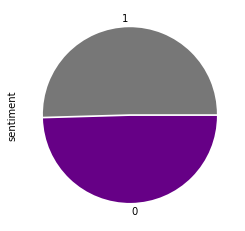

In [5]:
explode = [0.01, 0.01]
colors = ['#777777', '#660086']
df['sentiment'].value_counts().plot(
    kind='pie', colors=colors, explode=explode
)

In [6]:
df.head(n=6)

,text,sentiment
0,Not sure who was more lost - the flat characte...,0
1,Attempting artiness with black & white and cle...,0
2,Very little music or anything to speak of.,0
3,The best scene in the movie was when Gerardo i...,1
4,"The rest of the movie lacks art, charm, meanin...",0
5,Wasted two hours.,0


In [7]:
pd.options.display.max_colwidth = 90
df[['text', 'sentiment']].sample(5, random_state=42)

,text,sentiment
471,This is a stunning movie.,1
278,I had the mac salad and it was pretty bland so I will not be getting that again.,0
20,"The food, amazing.",1
150,"Audio Quality is poor, very poor.",0
430,His acting alongside Olivia De Havilland was brilliant and the ending was fantastic!,1


naive bayes

In [ ]:
import pandas as pd
import os
data_dir = f'{os.getcwd()}/text_dataset'
df_list = []
for csv_file in ['imdb_labelled.txt', 'yelp_labelled.txt','amazon_cells_labelled.txt']:
    csv_file_with_path = f'{data_dir}/sentiment labelled sentences/{csv_file}'
    temp_df = pd.read_csv(
        csv_file_with_path,sep="\t", header=0,
        names=['text', 'sentiment']
    )
    df_list.append(temp_df)
df = pd.concat(df_list)

In [8]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df, test_size=0.4,random_state=42)

In [18]:
y_train=df_train['sentiment']
y_test=df_test['sentiment']

Naive bayes using CountVectorizer

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer(ngram_range=(1,3),min_df=3,strip_accents='ascii')
x_train=vec.fit_transform(df_train['text'])
x_test=vec.transform(df_test['text'])

In [23]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB(fit_prior=True)
clf.fit(x_train,y_train)
y_test_predict = clf.predict(x_test)

In [25]:
from sklearn.metrics import precision_recall_fscore_support as score

Tuple \ an object \ a sentence can be of multi-class

In [28]:
s=score(y_test,y_test_predict)

In [31]:
pd.DataFrame(
    {
        'precision':s[0],
        'recall':s[1],
        'fscore':s[2],
        'support':s[3]
    },
    index=['negative','positive']
)

,precision,recall,fscore,support
negative,0.805861,0.778761,0.792079,565
positive,0.773551,0.801126,0.787097,533


In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test,y_test_predict)

0.7896174863387978

Naive bayes using tfidfVectorizer

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
# vec=TfidfVectorizer(ngram_range=(1,3),min_df=3,strip_accents='ascii')
vec = TfidfVectorizer(token_pattern=r'\w+')
x_train=vec.fit_transform(df_train['text'])
x_test=vec.transform(df_test['text'])
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB(fit_prior=True)
clf.fit(x_train,y_train)
y_test_predict = clf.predict(x_test)
s=score(y_test,y_test_predict)
pd.DataFrame(
    {
        'precision':s[0],
        'recall':s[1],
        'fscore':s[2],
        'support':s[3]
    },
    index=['negative','positive']
)

,precision,recall,fscore,support
negative,0.825137,0.801770,0.813285,565
positive,0.795993,0.819887,0.807763,533


using pipelines

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
import pandas as pd
import os
data_dir = f'{os.getcwd()}/text_dataset'
df_list = []
for csv_file in ['imdb_labelled.txt', 'yelp_labelled.txt','amazon_cells_labelled.txt']:
    csv_file_with_path = f'{data_dir}/sentiment labelled sentences/{csv_file}'
    temp_df = pd.read_csv(
        csv_file_with_path,sep="\t", header=0,
        names=['text', 'sentiment']
    )
    df_list.append(temp_df)
df = pd.concat(df_list)

In [8]:
df_train,df_test=train_test_split(df,test_size=0.4)

In [9]:
df.head(n=2)

,text,sentiment
0,Not sure who was more lost - the flat characte...,0
1,Attempting artiness with black & white and cle...,0


In [10]:
x_train=df_train['text']
y_train=df_train['sentiment']
x_test=df_test['text']
y_test=df_test['sentiment']

In [11]:
pipe=Pipeline(steps=[
('CountVectorizer', CountVectorizer()),
('MultinomialNB', MultinomialNB())]
)

In [12]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('CountVectorizer', CountVectorizer()),
                ('MultinomialNB', MultinomialNB())])

In [14]:
pipe.score(x_test,y_test)

0.7877959927140255